# KINGS COUNTRY HOUSING PRICES

### Import Libraries

In [235]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols

import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', 300)

### Import Data

In [236]:
data = pd.read_csv('./data/kc_house_data_train.csv')

## Exploratory Data Analysis 

### Distributions

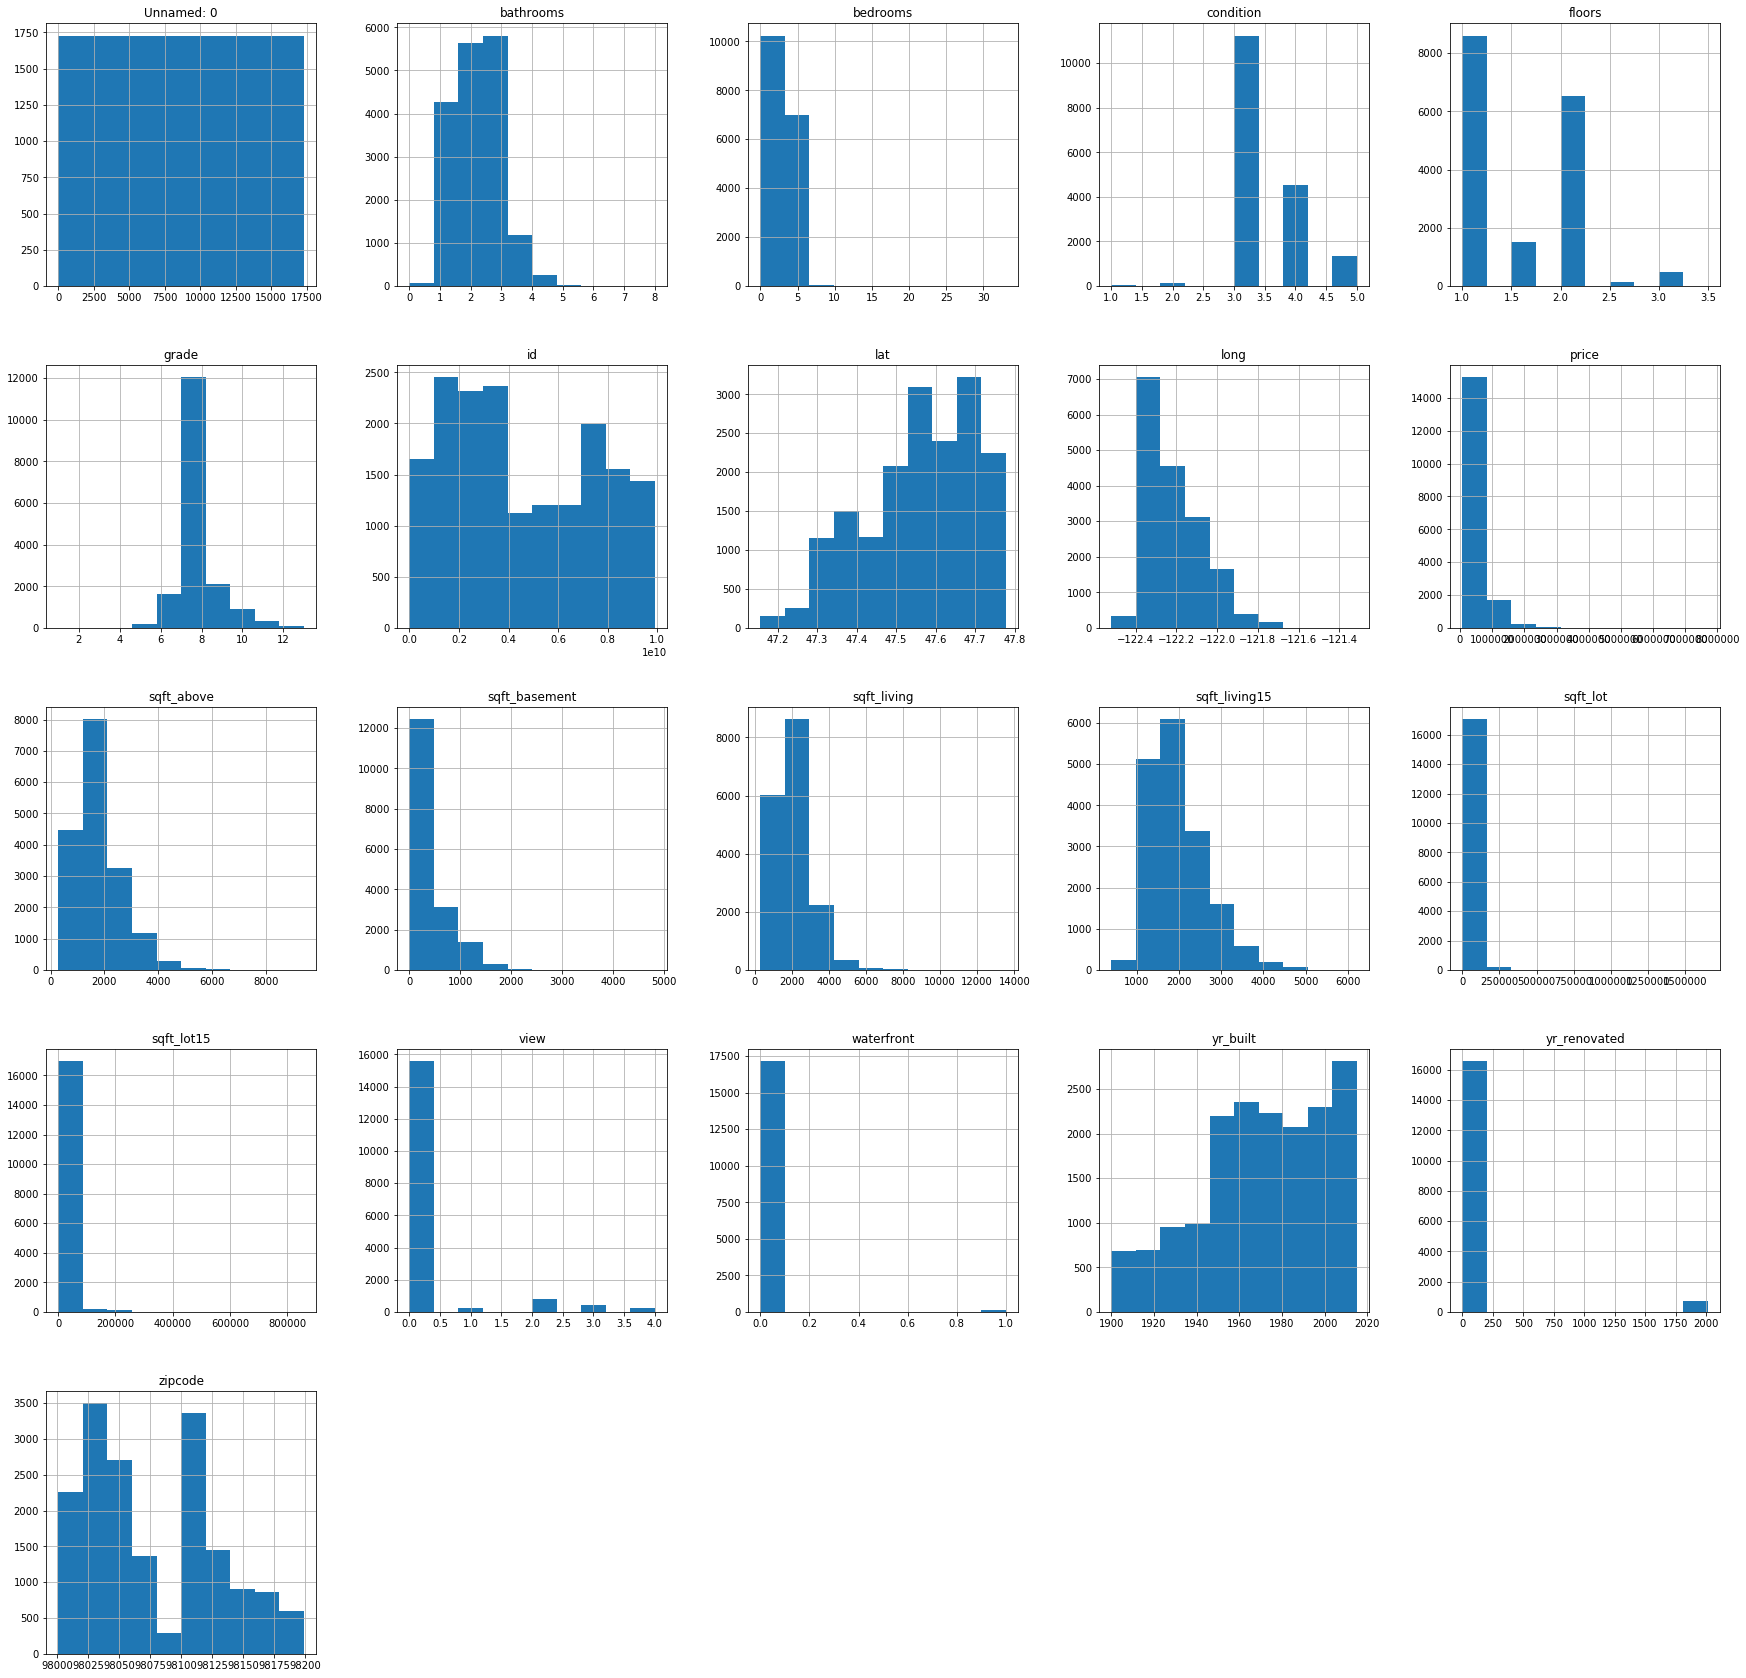

In [241]:
fig, ax = plt.subplots(figsize=(30,30))
data.hist(ax=ax)
plt.show()

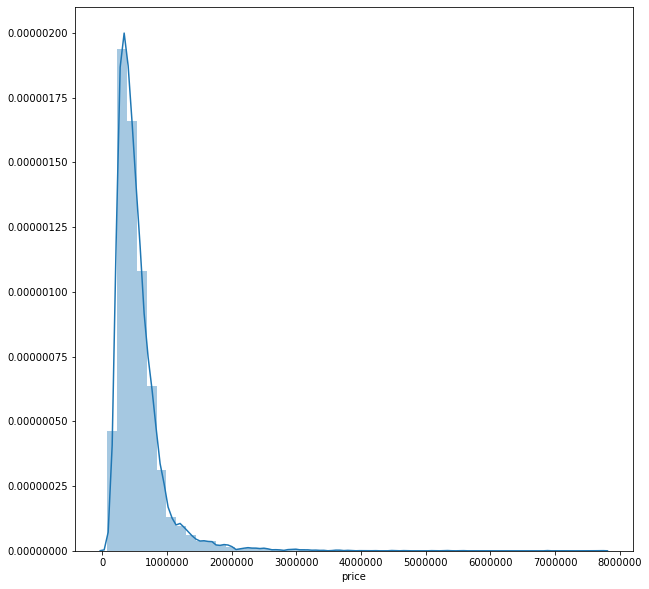

In [250]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(data.price, ax = ax)

### Relationships

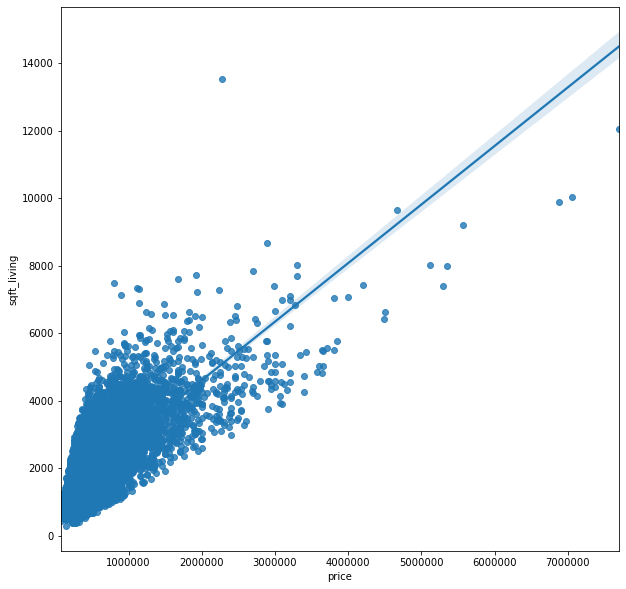

In [246]:
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(data.price, data.sqft_living)

In [189]:
correlation = data.corr()

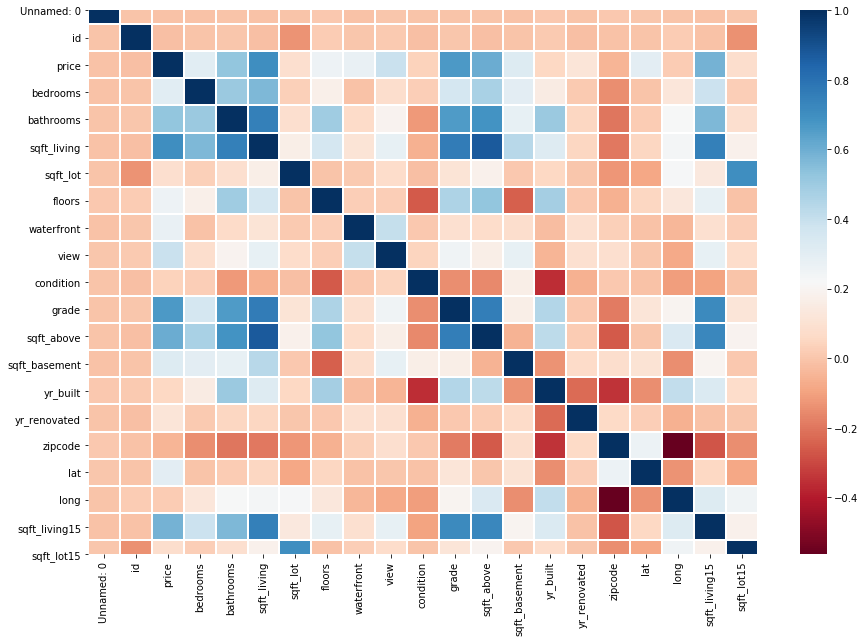

In [190]:
fig, ax = plt.subplots(figsize=(15,10))        
sns.heatmap(correlation, linewidths=1, ax=ax, xticklabels = correlation.columns, yticklabels = correlation.columns, cmap='RdBu')

### Outliers

In [191]:
desc_data = data.describe()

desc_data.loc['+3_std'] = desc_data.loc['50%'] + (desc_data.loc['std']*3)
desc_data.loc['-3_std'] = desc_data.loc['50%'] - (desc_data.loc['std']*3)

desc_data.loc['+5_std'] = desc_data.loc['50%'] + (desc_data.loc['std']*5)
desc_data.loc['-5_std'] = desc_data.loc['50%'] - (desc_data.loc['std']*5)

desc_data

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000
+3_std,23618.512238,1.252762e+10,1.569957e+06,5.818037,4.561429,4680.055618,1.345559e+05,3.116728,0.266954,2.325687,4.953887,10.524155,4047.795321,1329.455623,2062.030548,1200.988129,98225.823847,47.986837,-121.807428,3894.407904,89304.812750
-3_std,-6329.512238,-4.720317e+09,-6.699569e+05,0.181963,-0.061429,-840.055618,-1.192719e+05,-0.116728,-0.266954,-2.325687,1.046113,3.475845,-927.795321,-1329.455623,1885.969452,-1200.988129,97904.176153,47.156363,-122.652572,-214.407904,-74059.812750


# Feature Engineering

### Combining Features

In [251]:
#scales the house relative to neighbors
data['rel_to_neighbors'] = ((data.sqft_living/data.sqft_living15) + (data.sqft_lot/data.sqft_lot15))/2

In [252]:
#big multiplier for house based on condition and grade
data['size_quality'] = (data.condition + data.grade) * data.sqft_living

In [253]:
#Assessing entire property using multiplier for sqft_lot
data['property_score'] = (data.view / 4)*(data.waterfront + 1) * data.sqft_lot

In [254]:
#Changing renovated into a yes or no question to be used as multiplier for sqft_living
data['binary_reno'] = data.yr_renovated
data.binary_reno = data.binary_reno.apply(lambda x: 2 if x != 0 else 1)
data['reno_mult'] = ((data.binary_reno + 1) * data.sqft_living)
data = data.drop(columns='binary_reno')

In [255]:
#Use grade and sqft_living because they are the two biggest predictors per standard deviation
data['grade_sqft_living'] = (data.grade**2) * data.sqft_living

In [256]:
#Scale and add all categorical variables as sqft_living multiplier
data['categorical_proportions'] = ((data.grade / 13) + (data.condition / 5) + (data.view / 4)) * data.sqft_living

### Dummies

#### Zip Codes

In [202]:
zipcode_dummies = pd.get_dummies(data.zipcode)
merged = pd.concat([data,zipcode_dummies], axis='columns')
data = merged.drop(columns=['zipcode',98155])

#### Grade

In [ ]:
grade_dummies = pd.get_dummies(data_6.grade)
merged = pd.concat([data_6,grade_dummies],axis='columns')
data_6 = merged.drop(columns=['grade',13])

#### Yr_built

In [ ]:
built_dummies = pd.get_dummies(data_6.yr_built)
merged = pd.concat([data_6,built_dummies],axis='columns')
data_6 = merged.drop(columns=['yr_built',1951])

## Step 5: Train-Test Split

### Split

In [203]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

13832 train + 3458 test


### Std Scaler

In [209]:
x_train = train_set.drop('price', axis=1)
y_train = train_set['price'].copy()

In [207]:
# scale_data = x_train
# ss = StandardScaler()
# X_columns = list(scale_data.columns)
# X=scale_data[X_columns]
# X_scaled = ss.fit_transform(X)
# x_train.columns

In [208]:
# scale_data['scaled_price'] = X_scaled[:, 0]
# scale_data['scaled_bedrooms'] = X_scaled[:, 1]
# scale_data['scaled_bathrooms'] = X_scaled[:, 2]
# scale_data['scaled_sqft_living'] = X_scaled[:, 3]
# scale_data['scaled_sqft_lot'] = X_scaled[:, 4]
# scale_data['scaled_floors'] = X_scaled[:, 5]
# scale_data['scaled_waterfront'] = X_scaled[:, 6]
# scale_data['scaled_view'] = X_scaled[:, 7]
# scale_data['scaled_condition'] = X_scaled[:, 8]
# scale_data['scaled_grade'] = X_scaled[:, 9]
# scale_data['scaled_sqft_above'] = X_scaled[:, 10]
# scale_data['scaled_sqft_living15'] = X_scaled[:, 11]
# scale_data['scaled_sqft_lot15'] = X_scaled[:, 12]
# scale_data['scaled_date_year'] = X_scaled[:, 13]
# scale_data['scaled_date_month'] = X_scaled[:, 14]
# scale_data['scaled_date_day'] = X_scaled[:, 15]
# scale_data['scaled_rel_to_neighbors'] = X_scaled[:, 16]
# scale_data['scaled_size_quality'] = X_scaled[:, 17]
# scale_data['scaled_property_score'] = X_scaled[:, 18]
# scale_data['scaled_floor_reno_mult'] = X_scaled[:, 19]

### Fit to Training Data

In [211]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [213]:
coefficients = lr.coef_
variables = np.array(x_train.columns)

from functions import *
array_to_dict(coefficients, variables)

{'bedrooms': -1774.1171671741788,
 'bathrooms': 28702.766581257292,
 'sqft_living': -899.910910252472,
 'sqft_lot': 0.3901536074712908,
 'floors': -30647.034402536472,
 'waterfront': 646659.3260446808,
 'view': -19627.732874399288,
 'condition': -24699.949247333607,
 'grade': -27469.803312348577,
 'sqft_above': 426.6555029696028,
 'sqft_basement': 361.3323036819056,
 'yr_built': -203.30047036307428,
 'yr_renovated': -71.28698257376891,
 'lat': 217204.95521635155,
 'long': -217481.61028463946,
 'sqft_living15': 31.59556531106864,
 'sqft_lot15': 0.06617243649088778,
 'date_year': 40696.03775445119,
 'date_month': 1848.1728366050656,
 'date_day': -133.99921319615794,
 'rel_to_neighbors': 5555.991333541287,
 'size_quality': 10.485062829175149,
 'property_score': -1.8379951161914505,
 'reno_mult': 93.10337830023491,
 'grade_sqft_living': 19.285554792732,
 'categorical_proportions': 109.04236508617032,
 98001: -39204.546200110424,
 98002: -20057.893730609117,
 98003: -72024.5155651693,
 9800

In [214]:
lr.intercept_

-118115479.10409488

In [216]:
y_pred = lr.predict(x_train)
lr.score(x_train, y_train)

0.8504496051040796

In [217]:
lr_rsme = mean_squared_error(y_train, y_pred)
lr_rmse = np.sqrt(lr_rsme)

rmse_dollars = '${:,.2f}'.format(lr_rmse)
rmse_dollars

'$145,169.32'

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [ ]:
# your code here

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [ ]:
# your code here

### 5.2) Fit your scaler to training the data.

In [2]:
#your code here 

### 5.3) Transform the testing set with the scaler.

In [3]:
#your code here 

### 5.5) Use the model to predict on the training set and the test set.

In [5]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [6]:
#your code here 

### 5.7) Determine if your model is overfit.

In [ ]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [7]:
# your code here

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [8]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/